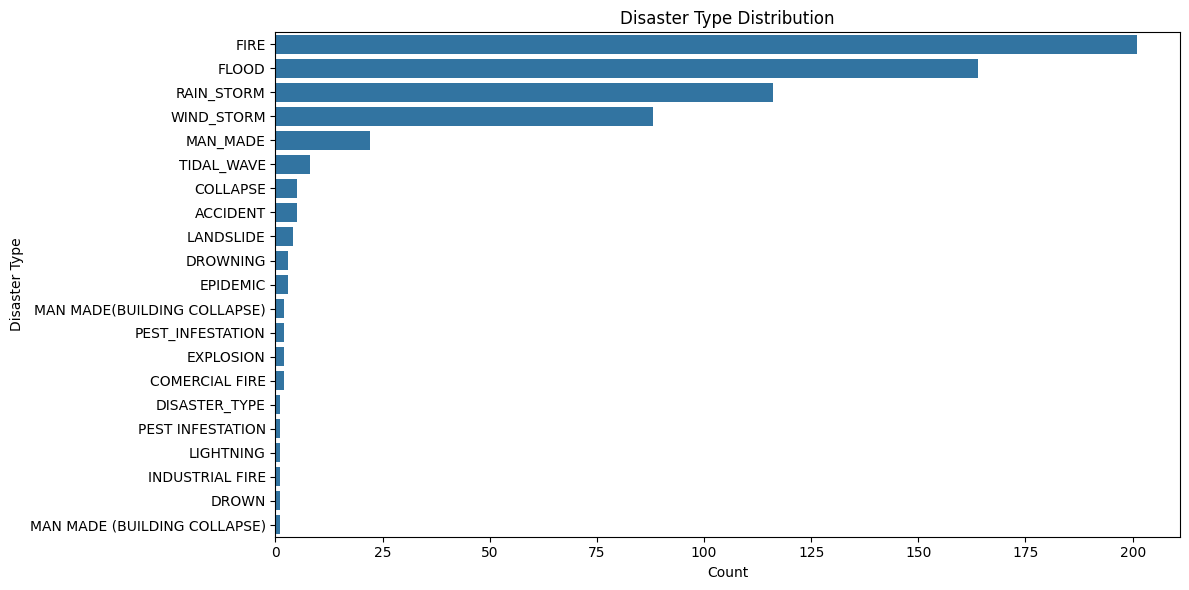

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


df = pd.read_csv('../data/processed/cleaned_disaster_data.csv')


plt.figure(figsize=(12, 6))
sns.countplot(y='disaster_type', data=df, order=df['disaster_type'].value_counts().index)
plt.title('Disaster Type Distribution')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.savefig('../reports/disaster_distribution.png')

monthly_counts = df.groupby('month').size().reset_index(name='count')
fig = px.line(monthly_counts, x='month', y='count', title='Monthly Disaster Frequency')
fig.update_layout(xaxis_title='Month', yaxis_title='Disaster Count')
fig.write_html('../reports/monthly_pattern.html')


top_locations = df['location'].value_counts().head(15).reset_index()
fig = px.bar(top_locations, x='count', y='location', orientation='h',
            title='Top 15 Most Affected Locations')
fig.update_layout(xaxis_title='Disaster Count', yaxis_title='Location')
fig.write_html('../reports/top_locations.html')


yearly_counts = df.groupby('year').size().reset_index(name='count')
fig = px.line(yearly_counts, x='year', y='count', title='Yearly Disaster Trend')
fig.update_layout(xaxis_title='Year', yaxis_title='Disaster Count')
fig.write_html('../reports/yearly_trend.html')